In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy import stats
from sklearn import metrics
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings("ignore")
plt.style.use('seaborn-darkgrid')

In [2]:
df=pd.read_csv('/work/sds-lab/Ashis/Hist_prss/ML_dataframe.csv')

In [3]:
df

,Date,Precipitation,Temperature,Relative_humidity,Air_Pressure,PRW
0,1/1/1915,3.900000e-05,275.14020,83.499230,83609.850,2.784520
1,1/2/1915,6.770000e-05,280.52010,88.843410,83221.570,3.970052
2,1/3/1915,1.750000e-06,276.48587,95.272660,83625.350,3.120856
3,1/4/1915,2.870000e-05,279.44635,88.040890,83994.516,2.128633
4,1/5/1915,1.280000e-08,267.71445,80.809130,84009.480,2.024976
...,...,...,...,...,...,...
36495,12/27/2014,5.570000e-05,273.45140,64.560680,83678.870,6.425169
36496,12/28/2014,5.180000e-08,274.76535,63.451500,83346.450,7.488951
36497,12/29/2014,3.000000e-10,272.95187,62.342327,83224.750,7.951182
36498,12/30/2014,3.810000e-07,274.79710,85.251480,83244.586,8.224910


In [4]:
df['Precipitation']=df['Precipitation']*86400

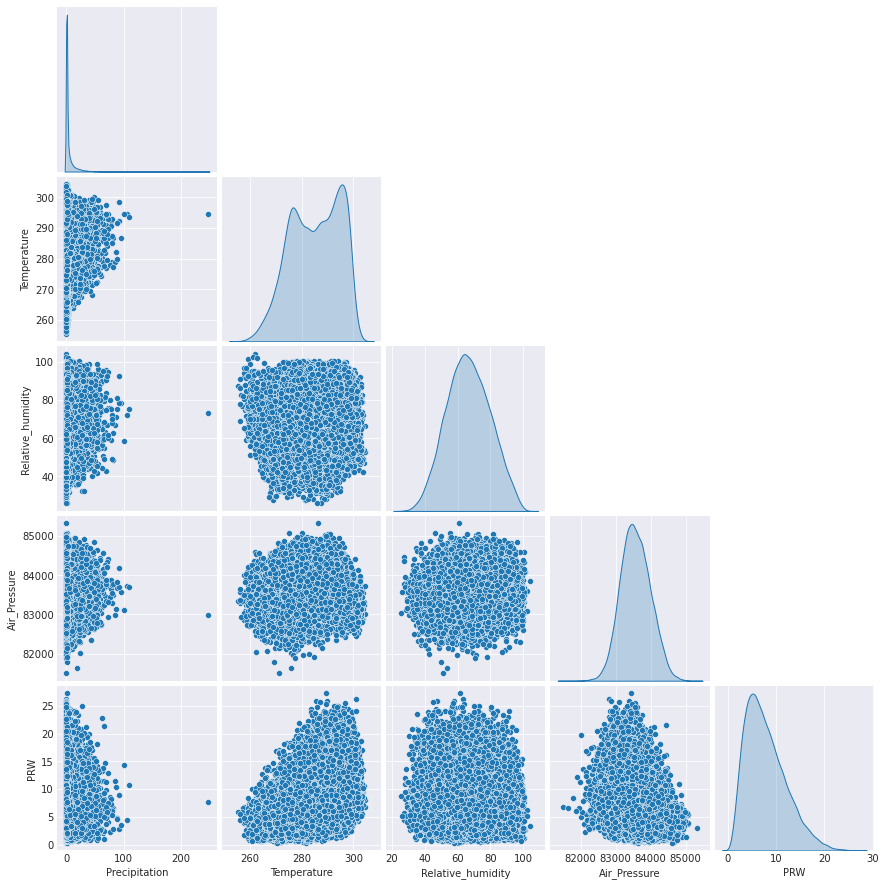

In [5]:
g = sns.pairplot(df,diag_kind="kde",corner=True)
#g = sns.pairplot(df)
plt.show()

<AxesSubplot:>

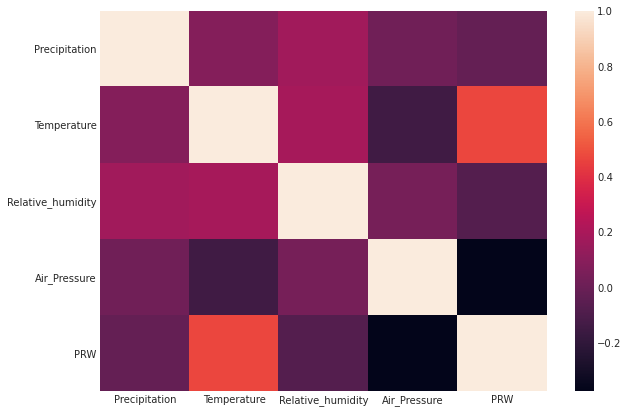

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())

In [7]:
df_num=pd.read_csv('/work/sds-lab/Ashis/Hist_prss/ML_dataframe.csv',parse_dates=['Date'],index_col=['Date'])
df_num['Precipitation']=df_num['Precipitation']*86400
# df_num=df_num.loc[:,['Precipitation','Temperature','Relative_humidity','Air_Pressure','PRW']]
df_num=df_num.loc[:,['Precipitation','Temperature','Relative_humidity']]
df_num.head()

,Precipitation,Temperature,Relative_humidity
Date,,,
1915-01-01,3.369600,275.14020,83.49923
1915-01-02,5.849280,280.52010,88.84341
1915-01-03,0.151200,276.48587,95.27266
1915-01-04,2.479680,279.44635,88.04089
1915-01-05,0.001106,267.71445,80.80913


In [8]:
df_num.columns

Index(['Precipitation', 'Temperature', 'Relative_humidity'], dtype='object')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

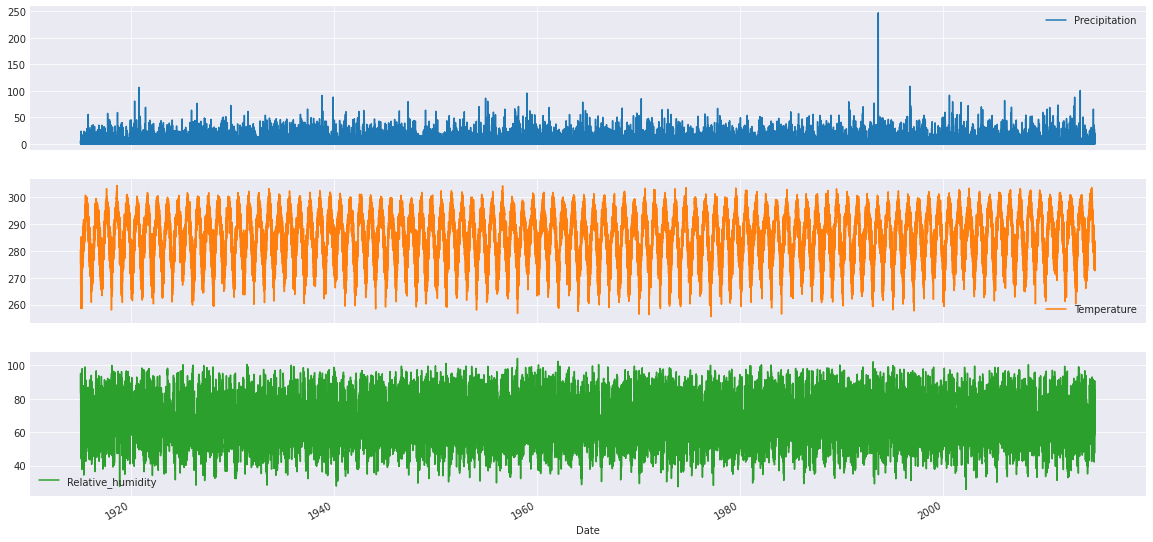

In [9]:
df_num.plot(subplots=True, figsize=(20,10))
# plt.savefig('indv_ft.png')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

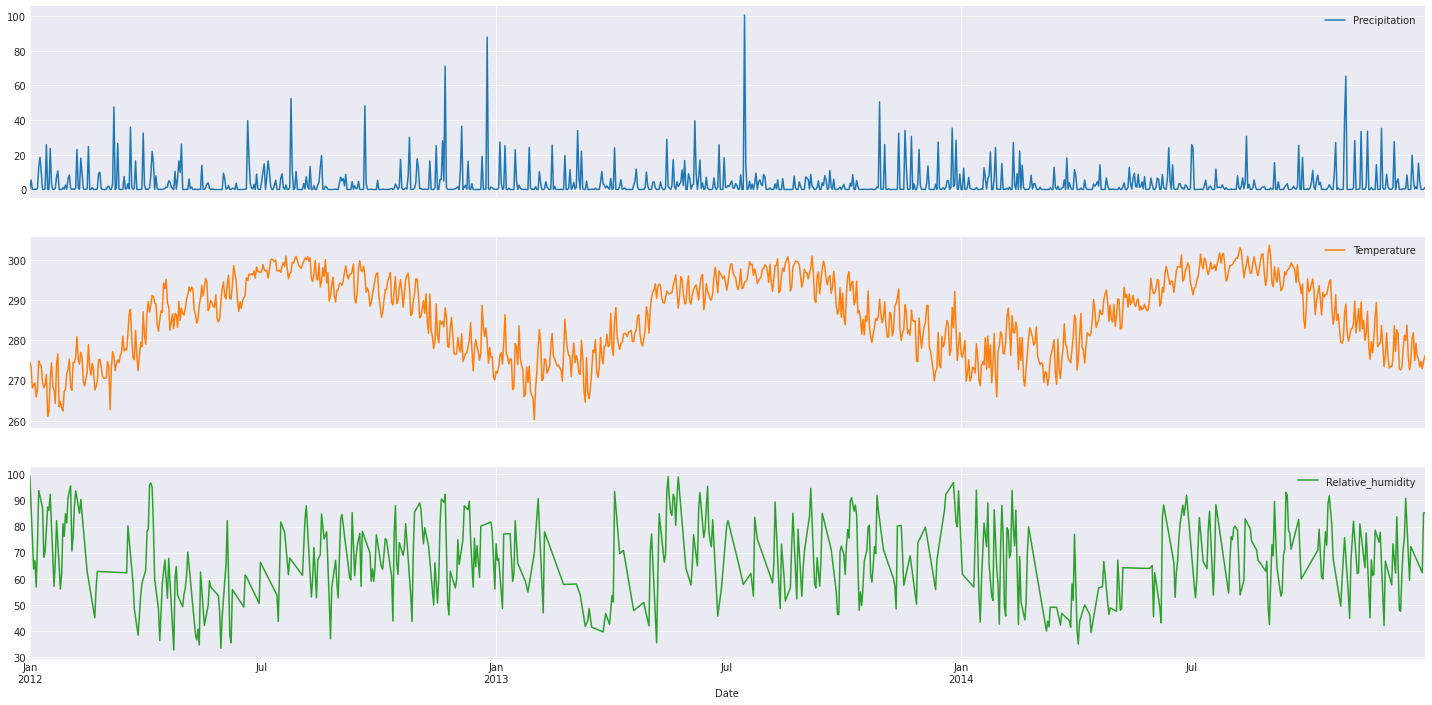

In [10]:
df_num['2012':'2014'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,12))

In [11]:
df_y=df_num.pop("Precipitation")
df_x=df_num

In [12]:
n_training_points = 29200

train_X,test_X = df_x[:n_training_points], df_x[n_training_points:]
train_y,test_y = df_y[:n_training_points], df_y[n_training_points:]

In [13]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [14]:
prediction = model.predict(test_X)
#calculating error
np.mean(np.absolute(prediction-test_y))

4.748446397192164

In [15]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})


,Actual,Prediction,diff
Date,,,
1995-01-01,0.266112,3.59,-3.323888
1995-01-02,30.774643,6.38,24.394643
1995-01-03,10.552291,6.01,4.542291
1995-01-04,41.332550,4.91,36.422550
1995-01-05,0.063677,3.51,-3.446323
...,...,...,...
2014-12-27,4.812480,2.91,1.902480
2014-12-28,0.004476,2.86,-2.855524
2014-12-29,0.000026,2.66,-2.659974


In [16]:
print('MSE: ', metrics.mean_squared_error(test_y, prediction))
print('MAE: ', metrics.mean_absolute_error(test_y, prediction))
print('R2: ', metrics.r2_score(test_y, prediction))
print('Correlation: ', stats.pearsonr(test_y, prediction)[0])
print('RSMLE: ', metrics.mean_squared_log_error(np.absolute(test_y), np.absolute(prediction)))
print('MAPE: ', metrics.mean_absolute_percentage_error(test_y, prediction ))

MSE:  69.47313823568844
MAE:  4.748443350859472
R2:  0.033597842172838344
Correlation:  0.18359404124167567
RSMLE:  1.5084493520658884
MAPE:  6338904785383.46


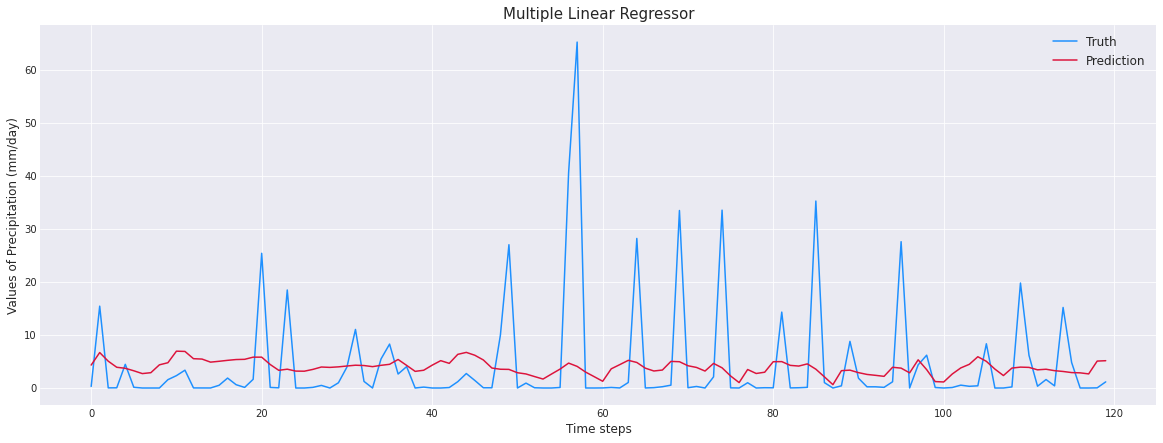

In [30]:
plt.figure(figsize=(20,7))
plt.plot(test_y.values[7180:7300], label='Truth',color='dodgerblue')
plt.plot(prediction[7180:7300], label='Prediction',color='crimson')
plt.ylabel('Values of Precipitation (mm/day)', fontsize=12)
plt.xlabel('Time steps', fontsize=12)
plt.title('Multiple Linear Regressor', fontsize='15')
plt.legend(fontsize=12)
plt.savefig('P_Multiple Linear Regressor.png')
plt.show()

In [18]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [19]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

5.722912618524533

In [20]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
Date,,,
1995-01-01,0.266112,1.50,-1.233888
1995-01-02,30.774643,0.22,30.554643
1995-01-03,10.552291,2.15,8.402291
1995-01-04,41.332550,7.02,34.312550
1995-01-05,0.063677,0.00,0.063677
...,...,...,...
2014-12-27,4.812480,0.14,4.672480
2014-12-28,0.004476,0.00,0.004476
2014-12-29,0.000026,0.08,-0.079974


In [21]:
print('MSE: ', metrics.mean_squared_error(test_y, prediction2))
print('MAE: ', metrics.mean_absolute_error(test_y, prediction2))
print('R2: ', metrics.r2_score(test_y, prediction2))
print('Correlation: ', stats.pearsonr(test_y, prediction2)[0])
print('RSMLE: ', metrics.mean_squared_log_error(np.absolute(test_y), np.absolute(prediction2)))
print('MAPE: ', metrics.mean_absolute_percentage_error(test_y, prediction2 ))

MSE:  136.7772787543508
MAE:  5.722969142581566
R2:  -0.9026325956588186
Correlation:  0.05564787427966905
RSMLE:  1.9538786536393737
MAPE:  3487519175680.918


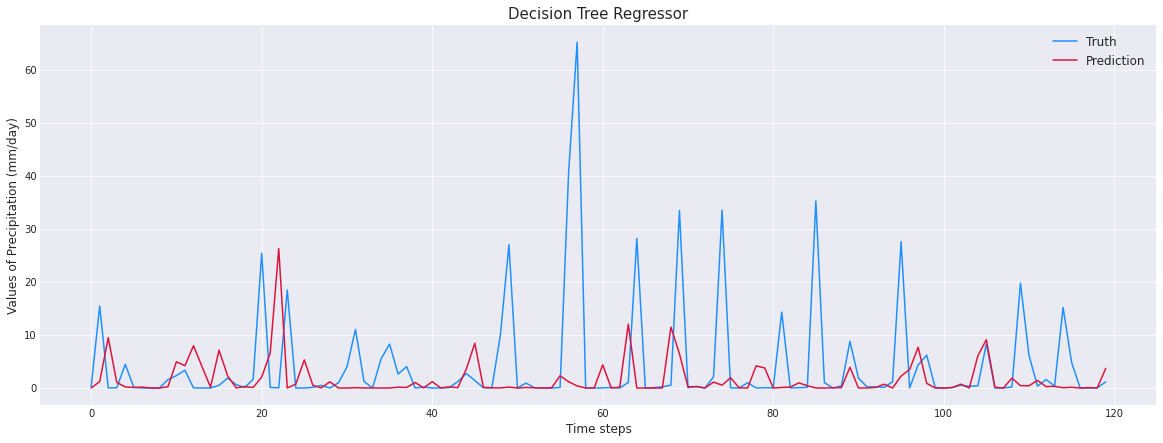

In [31]:
plt.figure(figsize=(20,7))
plt.plot(test_y.values[7180:7300], label='Truth',color='dodgerblue')
plt.plot(prediction2[7180:7300], label='Prediction',color='crimson')
plt.ylabel('Values of Precipitation (mm/day)', fontsize=12)
plt.xlabel('Time steps', fontsize=12)
plt.title('Decision Tree Regressor', fontsize='15')
plt.legend(fontsize=12)
plt.savefig('P_Decision Tree Regressor.png')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [24]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

4.889293307356949

In [25]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
Date,,,
1995-01-01,0.266112,1.73,-1.463888
1995-01-02,30.774643,2.27,28.504643
1995-01-03,10.552291,4.29,6.262291
1995-01-04,41.332550,7.19,34.142550
1995-01-05,0.063677,0.22,-0.156323
...,...,...,...
2014-12-27,4.812480,0.70,4.112480
2014-12-28,0.004476,5.16,-5.155524
2014-12-29,0.000026,0.65,-0.649974


In [26]:
print('MSE: ', metrics.mean_squared_error(test_y, prediction3))
print('MAE: ', metrics.mean_absolute_error(test_y, prediction3))
print('R2: ', metrics.r2_score(test_y, prediction3))
print('Correlation: ', stats.pearsonr(test_y, prediction3)[0])
print('RSMLE: ', metrics.mean_squared_log_error(np.absolute(test_y), np.absolute(prediction3)))
print('MAPE: ', metrics.mean_absolute_percentage_error(test_y, prediction3 ))

MSE:  76.41968472418505
MAE:  4.889313698706329
R2:  -0.0630316996387803
Correlation:  0.1375331444854991
RSMLE:  1.5605798649697122
MAPE:  4038865788385.029


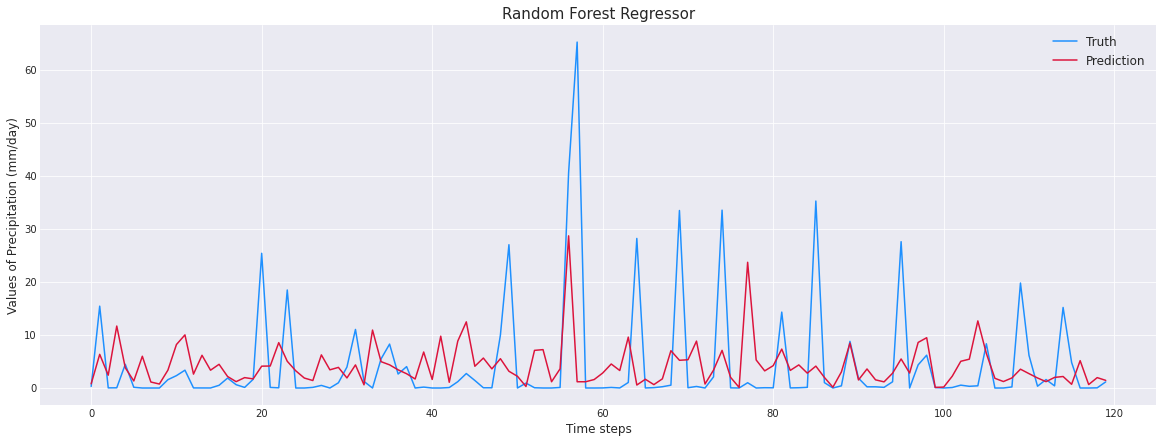

In [32]:
plt.figure(figsize=(20,7))
plt.plot(test_y.values[7180:7300], label='Truth',color='dodgerblue')
plt.plot(prediction3[7180:7300], label='Prediction',color='crimson')
plt.ylabel('Values of Precipitation (mm/day)', fontsize=12)
plt.xlabel('Time steps', fontsize=12)
plt.title('Random Forest Regressor', fontsize='15')
plt.legend(fontsize=12)
plt.savefig('P_Random Forest Regressor.png')
plt.show()